In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def sobrerelax(phi,V,omega,tol = 1e-3):
    Nxdim,Nydim = np.shape(phi)
    phi_old = np.zeros(np.shape(phi))
    r = np.zeros(np.shape(phi))
    n = 0
    while (abs(phi_old-phi)>tol).any():
        phi_old = phi.copy()
        for i in range(1,Nxdim-1):
            for j in range(1,Nydim-1):
                if phi[i,j] == V or Phi[i,j] == -V:
                    continue
                else:
                    phi[i,j] = 0.25*(phi_old[i+1,j]+phi_old[i-1,j]+phi_old[i,j+1]+phi_old[i,j-1])
                    r[i,j] = 0.25*(phi_old[i+1,j]+phi[i-1,j]+phi_old[i,j+1]+phi[i,j-1])-phi_old[i,j] 
                    phi[i,j] = phi_old[i,j] + omega*r[i,j]
        n+=1
    print('Iteraciones:',n,'Omega:',omega) 
    return phi

def plots(Phi):
    Ey,Ex = np.gradient(Phi)
    Ex,Ey = -Ex,-Ey
    E_norm = np.sqrt(Ex**2.+Ey**2.)
    x,y = np.meshgrid(X,Y)
    plt.quiver(x[::4,::4],y[::4,::4],Ex[::4,::4]/E_norm[::4,::4],Ey[::4,::4]/E_norm[::4,::4],
           scale=30,zorder=3,width=0.003, headwidth=3., headlength=4.,color='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.contour(X, Y, Phi, 20, colors='k')
    plt.pcolor(X, Y, Phi,cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label(r'$\Phi(x,y)$', rotation=90)
    plt.axis('equal')
    plt.show()
    x,y = np.meshgrid(X,Y)
    ax = plt.axes(projection='3d')
    ax.plot_surface(x,y,Phi,cmap = 'jet')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'$\Phi(x,y)$')
    plt.show()

# Problema 1

Iteraciones: 134 Omega: 1.89


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


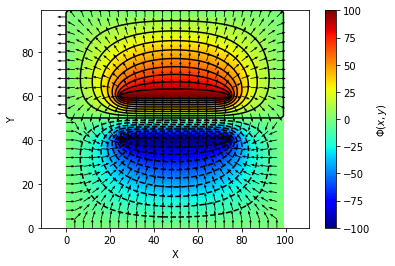

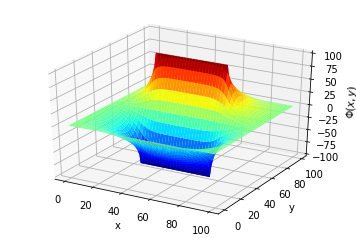

In [3]:
# Problema 1
V = 100.
d = 20
w = 50
Phi = np.zeros([100,100])
Xdim,Ydim = np.shape(Phi)
X,Y = np.arange(Xdim),np.arange(Ydim)
Phi[int(Ydim/2 + d/2),int(Xdim/2-w/2):int(Xdim/2+w/2)] = V
Phi[int(Ydim/2 - d/2),int(Xdim/2-w/2):int(Xdim/2+w/2)] = -V
Phi = sobrerelax(Phi,V,omega = 1.89)
plots(Phi)

# Problema 2

In [4]:
V = 100.
def setValues(V,beta):
    Phi = np.zeros([100,100])
    Xdim,Ydim = Phi.shape
    R = np.sqrt(Xdim**2+Ydim**2)
    r = R/2.
    if beta < 90:
        X,Y = np.arange(Xdim),np.arange(Ydim)
        y,x = np.ogrid[0:Xdim,0:Ydim]
        Mask1 = np.degrees(np.arctan2(y,x)) > beta
        Phi[Mask1] = V
        Phi[0,:] = V
    elif beta == 90:
        Phi[:,0:10] = V
        Phi[0:10,:] = V
    elif beta == 180:
        Phi[0:10,:] = V
    elif beta > 180:
        y,x = np.ogrid[-Xdim/2:Xdim/2,-Ydim/2:Ydim/2]
        Mask1 = np.degrees(np.arctan2(y,x))%360 > beta
        Phi[Mask1] = V
    return Phi

Iteraciones: 173 Omega: 1.89


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


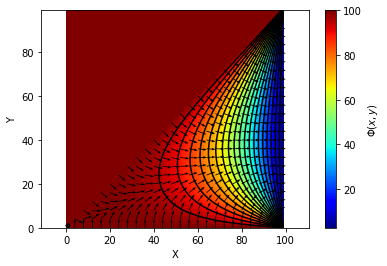

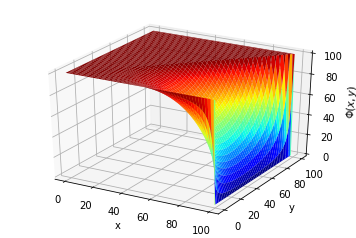

In [5]:
#Problema 2.1
Phi = setValues(V,45)
Phi = sobrerelax(Phi,V,omega = 1.89)
plots(Phi)

Iteraciones: 176 Omega: 1.93


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


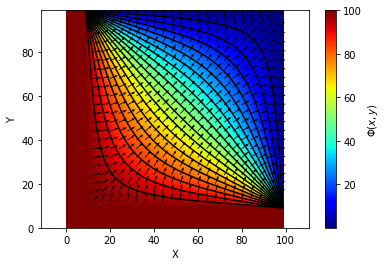

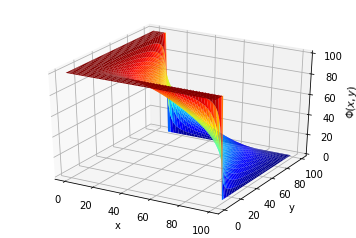

In [6]:
#Problema 2.2
Phi = setValues(V,90)
Phi = sobrerelax(Phi,V,omega = 1.93)
plots(Phi)

Iteraciones: 215 Omega: 1.92


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


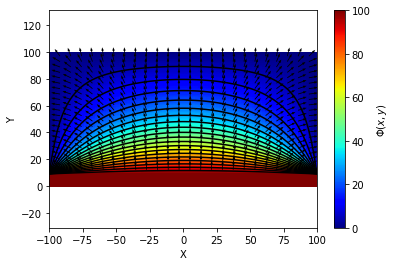

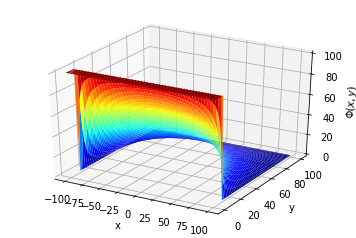

In [7]:
#Problema 2.3
X,Y = np.linspace(-Xdim,Xdim,Xdim),np.linspace(0,Ydim,Ydim)
Phi = setValues(V,180)
Phi = sobrerelax(Phi,V,omega = 1.92)
plots(Phi)

Iteraciones: 212 Omega: 1.89


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


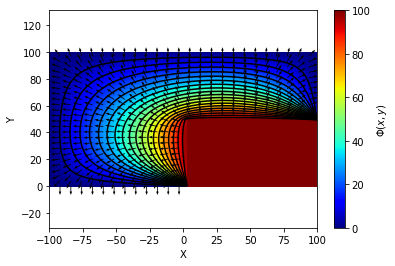

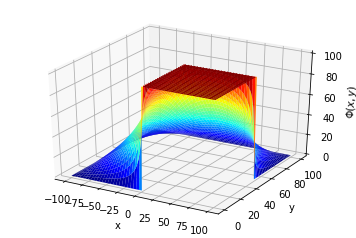

In [8]:
#Problema 2.4
X,Y = np.linspace(-Xdim,Xdim,Xdim),np.linspace(0,Ydim,Ydim)
Phi = setValues(V,270)
Phi = sobrerelax(Phi,V,omega = 1.89)
plots(Phi)

Iteraciones: 188 Omega: 1.92


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


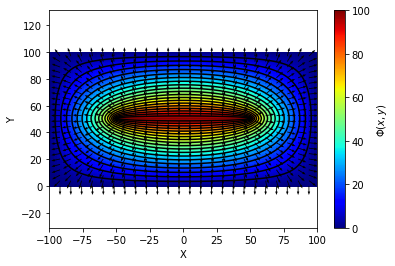

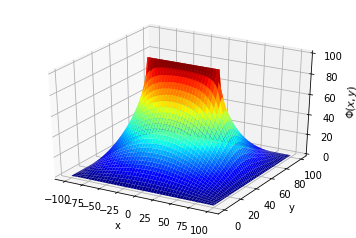

In [9]:
#Problema 2.5
Phi = np.zeros([100,100])
Phi[50,25:75] = V
Phi = sobrerelax(Phi,V,omega = 1.92)
plots(Phi)

# Problema 3

In [10]:
V = 100.
a = 5
b = 15
Phi = np.zeros([100,100])
Xdim,Ydim = np.shape(Phi)
X,Y = np.arange(Xdim),np.arange(Ydim)
y,x = np.ogrid[-Xdim/2:Xdim/2,-Ydim/2:Ydim/2]
Mask_a = x**2+y**2 <= a**2
Mask_b = x**2+y**2 <= b**2
Phi[Mask_b] = V
Phi[Mask_a] = -V

Iteraciones: 166 Omega: 1.92


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


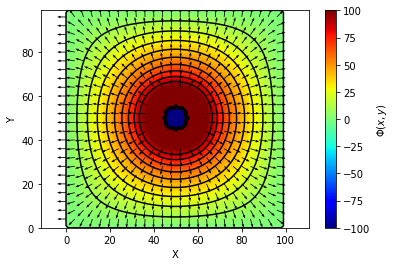

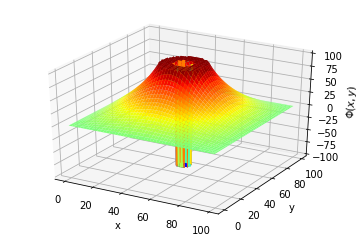

In [11]:
Phi = sobrerelax(Phi,V,omega=1.92)
plots(Phi)

# Problema 4

In [12]:
# Ultimo problema en cartesianas
V = 100
Phi = setValues(V,70)
a = 30
Xdim,Ydim = np.shape(Phi)
X,Y = np.arange(Xdim),np.arange(Ydim)
y,x = np.ogrid[0:Xdim,0:Ydim]
Mask = x**2+y**2 <= a**2
Phi[Mask] = V

Iteraciones: 197 Omega: 1.92


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


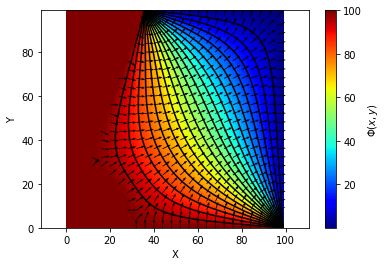

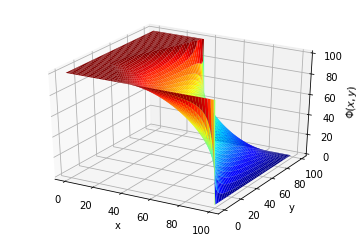

In [13]:
Phi = sobrerelax(Phi,V,omega=1.92)
plots(Phi)

# Coordenadas Polares

In [14]:
def relaxPolar(phi,V,omega,tol = 1e-3):
    Nrdim,Nthetadim = np.shape(phi)
    phi_old = np.zeros(np.shape(phi))
    R = np.zeros(np.shape(phi))
    n = 0
    while (abs(phi_old-phi)>tol).any():
        phi_old = phi.copy()
        for r in range(1,Nrdim-1):
            for theta in range(0,Nthetadim-1):
                if phi[r,theta] == V or phi[r,theta] == -V:
                    continue
                else:
                    phi[r,theta] = (0.5*r**2.*(phi[r+1,theta]+phi[r-1,theta])\
                                  +0.5*(phi[r,theta+1]+phi[r,theta-1])\
                                  +0.25*r*(phi[r+1,theta]-phi[r-1,theta]))/(r**2.+1)
                    R[r,theta] = 0.25*(phi_old[r+1,theta]+phi[r-1,theta]\
                                       +phi_old[r,theta+1]+phi[r,theta-1])-phi_old[r,theta] 
                    phi[r,theta] = phi_old[r,theta] + omega*R[r,theta]
                    phi[r,-1]=phi[r,0]
        n+=1
    print('Iteraciones:',n) 
    return phi

In [15]:
def setValuesPolar(V,beta):
    Phi = np.zeros([100,360])
    Phi[:,0] = V
    Phi[:,beta:] = V
    return Phi

In [16]:
def polarplots(Phi,beta,quiver=True):
    r = np.arange(100)
    theta = np.linspace(0,361,360)
    theta = np.radians(theta)
    Theta,R= np.meshgrid(theta,r) 
    Etheta,Er = np.gradient(Phi)
    Er,Etheta = -Er,-Etheta
    E_norm = np.sqrt(Er**2.+Etheta**2.)
    ax = plt.subplot(111, projection='polar')
    if quiver == True:
        ax.quiver(Theta[::4,::4],R[::4,::4],Etheta[::4,::4]/E_norm[::4,::4],Er[::4,::4]/E_norm[::4,::4],
           scale=30,zorder=3,width=0.003, headwidth=3., headlength=4.,color='k')
    ax.contour(Theta, R, Phi, 20, colors='k')
    ax.pcolormesh(Theta,R,Phi,cmap='jet')
    ax.set_thetamin(0)
    if beta<=90:
        ax.set_thetamax(90)
    elif beta<=180:
        ax.set_thetamax(180)
    elif beta<=270:
        ax.set_thetamax(270)
    else:
        ax.set_thetamax(360)
    plt.show()

Iteraciones: 329


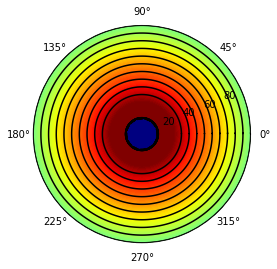

In [17]:
#Problema3
V = 100.
a = 15
b = 30
Phi = np.zeros([100,360])
Phi[:b,:] = V
Phi[:a,:] = -V
Phi=relaxPolar(Phi,V,omega=1.92)
polarplots(Phi,360,quiver=False)

Iteraciones: 159


/home/hiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


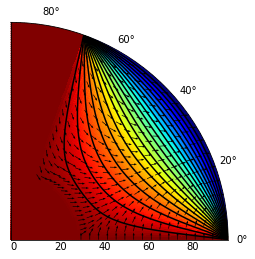

In [18]:
#Problema 4
Phi = setValuesPolar(V,70)
Phi[0:30,:] = V
Phi=relaxPolar(Phi,V,omega=1.92)
polarplots(Phi,70)